In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px #Plotly

In [398]:
circuits_archive = pd.read_csv('circuits.csv')
constructor_results_archive = pd.read_csv('constructor_results.csv')
constructor_standings_archive = pd.read_csv('constructor_standings.csv')
constructor_archive = pd.read_csv('constructors.csv')
driver_standings_archive = pd.read_csv('driver_standings.csv')
drivers_archive = pd.read_csv('drivers.csv')
lap_times_archive = pd.read_csv('lap_times.csv')
pit_stops_archive = pd.read_csv('pit_stops.csv')
qualifying_archive = pd.read_csv('qualifying.csv')
races_archive = pd.read_csv('races.csv')
results_archive = pd.read_csv('results.csv')
seasons_archive = pd.read_csv('seasons.csv')
sprint_results_archive = pd.read_csv('sprint_results.csv')
status_archive = pd.read_csv('status.csv')

# Circuits

In [399]:
circuits_archive.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [400]:
circuits_archive.shape

(77, 9)

In [401]:
circuits_archive.dtypes

circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt            object
url            object
dtype: object

In [402]:
circuits_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [403]:
circuits_archive.describe()

,circuitId,lat,lng
count,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683
std,23.001701,22.808866,65.516951
min,1.000000,-37.849700,-118.189000
25%,20.000000,32.777400,-9.394170
50%,40.000000,40.951700,3.930830
75%,59.000000,46.958900,19.248600
max,80.000000,57.265300,144.968000


In [404]:
#Excluir colunas não necessárias
circuits = circuits_archive.drop(columns = ['url', 'name', 'location'], axis = 1)

In [405]:
#Transformar a coluna alt em float64
#utilizei errors='coerce' para transformar qualquer valor não numérico em NaN(not a number) 
circuits['alt'] = pd.to_numeric(circuits['alt'], errors='coerce', downcast='integer')
circuits['alt'] = circuits['alt'].round(0)

In [406]:
circuits.head()

,circuitId,circuitRef,country,lat,lng,alt
0,1,albert_park,Australia,-37.84970,144.96800,10.0
1,2,sepang,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Spain,41.57000,2.26111,109.0
4,5,istanbul,Turkey,40.95170,29.40500,130.0


In [407]:
circuits.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,74.000000
mean,39.883117,33.442925,1.076683,248.189189
std,23.001701,22.808866,65.516951,365.041851
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,19.250000
50%,40.000000,40.951700,3.930830,129.500000
75%,59.000000,46.958900,19.248600,315.500000
max,80.000000,57.265300,144.968000,2227.000000


In [408]:
alt_unicas = circuits['alt'].unique()
alt_unicas

array([ 1.000e+01,  1.800e+01,  7.000e+00,  1.090e+02,  1.300e+02,
        1.300e+01,  2.280e+02,  1.530e+02,  1.030e+02,  2.640e+02,
        4.000e+00,  4.010e+02,  1.620e+02,  5.830e+02,  5.000e+00,
        7.850e+02,  2.230e+02,  5.780e+02,  3.700e+01,  4.500e+01,
              nan,  3.000e+00,  8.000e+00,  2.660e+02,  5.800e+01,
        1.460e+03,  8.800e+01,  2.227e+03,  3.450e+02,  4.320e+02,
        0.000e+00,  1.126e+03,  1.770e+02,  1.450e+02,  6.000e+00,
        3.600e+01,  4.840e+02,  1.390e+02,  1.200e+01,  6.390e+02,
        6.090e+02,  4.850e+02,  3.320e+02,  7.900e+01,  7.900e+02,
        2.140e+02,  8.100e+01,  6.700e+01,  1.500e+01,  6.760e+02,
        2.000e+01,  2.800e+01,  4.700e+02,  5.300e+01,  1.580e+02,
        1.900e+01,  1.290e+02,  5.510e+02,  8.500e+01,  1.940e+02,
        1.610e+02,  6.780e+02,  2.000e+00, -7.000e+00,  1.080e+02,
        2.550e+02])

In [409]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   country     77 non-null     object 
 3   lat         77 non-null     float64
 4   lng         77 non-null     float64
 5   alt         74 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.7+ KB


<Axes: >

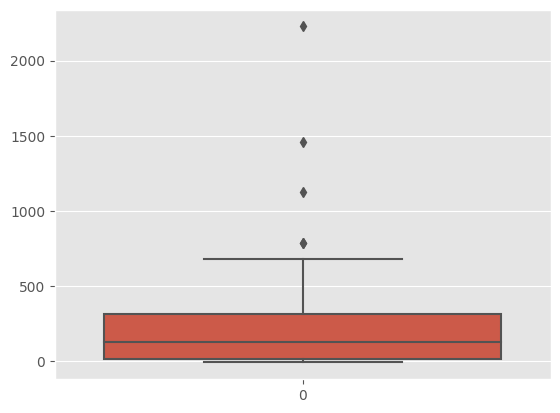

In [412]:
boxplot(circuits.alt)

# Constructor Results

In [ ]:
constructor_results_archive.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [413]:
unico_status = constructor_results_archive['status'].unique()
unico_status

array(['\\N', 'D'], dtype=object)

In [ ]:
constructor_results_archive.shape

(12170, 5)

In [ ]:
constructor_results_archive.dtypes

constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

In [ ]:
constructor_results_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12170 entries, 0 to 12169
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12170 non-null  int64  
 1   raceId                12170 non-null  int64  
 2   constructorId         12170 non-null  int64  
 3   points                12170 non-null  float64
 4   status                12170 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 475.5+ KB


In [ ]:
constructor_results_archive.describe()

,constructorResultsId,raceId,constructorId,points
count,12170.000000,12170.000000,12170.000000,12170.000000
mean,8106.815037,505.922350,44.160394,3.788661
std,5523.404639,298.367868,57.248981,7.427196
min,1.000000,1.000000,1.000000,0.000000
25%,3043.250000,278.000000,6.000000,0.000000
50%,6085.500000,474.000000,22.000000,0.000000
75%,13593.750000,713.000000,52.000000,4.000000
max,16669.000000,1096.000000,214.000000,66.000000


In [414]:
constructor_results = constructor_results_archive.drop(columns = ['status'], axis = 1)

In [415]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0


# Constructor Standings

In [ ]:
constructor_standings_archive.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [ ]:
constructor_standings_archive.shape

(12941, 7)

In [ ]:
constructor_standings_archive.dtypes

constructorStandingsId      int64
raceId                      int64
constructorId               int64
points                    float64
position                    int64
positionText               object
wins                        int64
dtype: object

In [ ]:
constructor_standings_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12941 non-null  int64  
 1   raceId                  12941 non-null  int64  
 2   constructorId           12941 non-null  int64  
 3   points                  12941 non-null  float64
 4   position                12941 non-null  int64  
 5   positionText            12941 non-null  object 
 6   wins                    12941 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 707.8+ KB


In [ ]:
constructor_standings_archive.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins
count,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000
mean,16573.817402,515.004946,48.070474,33.776486,7.286068,0.678927
std,8741.992501,292.559215,59.400459,76.875428,4.386319,1.818736
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8771.000000,294.000000,6.000000,0.000000,4.000000,0.000000
50%,20124.000000,494.000000,25.000000,6.000000,7.000000,0.000000
75%,24592.000000,714.000000,57.000000,31.000000,10.000000,0.000000
max,28412.000000,1098.000000,214.000000,765.000000,22.000000,19.000000


# Constructor

In [ ]:
constructor_archive.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
constructor_archive.shape

(211, 5)

In [ ]:
constructor_archive.dtypes

constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object

In [ ]:
constructor_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [ ]:
constructor_archive.describe()

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


# Driver Standings

In [ ]:
driver_standings_archive.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [ ]:
driver_standings_archive.shape

(33902, 7)

In [ ]:
driver_standings_archive.dtypes

driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object

In [ ]:
driver_standings_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [ ]:
driver_standings_archive.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000


# Drivers

In [ ]:
drivers_archive.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
drivers_archive.shape

(857, 9)

In [ ]:
drivers_archive.dtypes

driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object

In [ ]:
drivers_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [ ]:
drivers_archive.describe()

,driverId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


# Lap Times

In [ ]:
lap_times_archive.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
lap_times_archive.shape

(538121, 6)

In [ ]:
lap_times_archive.dtypes

raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

In [ ]:
lap_times_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [ ]:
lap_times_archive.describe()

,raceId,driverId,lap,position,milliseconds
count,538121.000000,538121.000000,538121.000000,538121.000000,5.381210e+05
mean,551.226841,285.445078,29.965461,9.651287,9.572079e+04
std,422.395496,373.403612,18.412489,5.539014,7.477436e+04
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04
25%,129.000000,15.000000,14.000000,5.000000,8.207100e+04
50%,841.000000,37.000000,29.000000,9.000000,9.067300e+04
75%,966.000000,817.000000,44.000000,14.000000,1.023190e+05
max,1096.000000,856.000000,87.000000,24.000000,7.507547e+06


# Pit Stops

In [ ]:
pit_stops_archive.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
pit_stops_archive.shape

(9634, 7)

In [ ]:
pit_stops_archive.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

In [ ]:
pit_stops_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


In [ ]:
pit_stops_archive.describe()

,raceId,driverId,stop,lap,milliseconds
count,9634.000000,9634.000000,9634.000000,9634.000000,9.634000e+03
mean,956.103384,513.030828,1.760536,25.255553,7.240173e+04
std,76.862933,391.682304,0.914522,14.579838,2.738340e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,885.000000,18.000000,1.000000,13.000000,2.190825e+04
50%,953.000000,815.000000,2.000000,25.000000,2.355700e+04
75%,1024.000000,830.000000,2.000000,36.000000,2.618675e+04
max,1096.000000,856.000000,6.000000,78.000000,3.069017e+06


# Qualifying

In [ ]:
qualifying_archive.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [ ]:
qualifying_archive.shape

(9575, 9)

In [ ]:
qualifying_archive.dtypes

qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

In [ ]:
qualifying_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


In [ ]:
qualifying_archive.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000,9575.000000
mean,4798.950078,576.919582,303.456710,43.512376,17.865483,11.263603
std,2777.072171,418.409302,377.386772,69.884962,17.633755,6.302077
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2395.500000,116.500000,15.000000,4.000000,7.000000,6.000000
50%,4790.000000,851.000000,49.000000,9.000000,14.000000,11.000000
75%,7203.500000,972.000000,817.000000,25.000000,22.000000,17.000000
max,9632.000000,1096.000000,856.000000,214.000000,99.000000,28.000000


# Races

In [ ]:
races_archive.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
races_archive.shape

(1102, 18)

In [ ]:
races_archive.dtypes

raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

In [ ]:
races_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


In [ ]:
races_archive.describe()

,raceId,year,round,circuitId
count,1102.000000,1102.000000,1102.000000,1102.000000
mean,553.853902,1992.049002,8.507260,23.697822
std,321.706151,20.308639,5.097545,19.337398
min,1.000000,1950.000000,1.000000,1.000000
25%,276.250000,1976.000000,4.000000,9.000000
50%,551.500000,1994.000000,8.000000,18.000000
75%,826.750000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,23.000000,80.000000


# Results

In [ ]:
results_archive.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
results_archive.shape

(25840, 18)

In [ ]:
results_archive.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [ ]:
results_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [ ]:
results_archive.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


# Seasons

In [ ]:
seasons_archive.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [ ]:
seasons_archive.shape

(74, 2)

In [ ]:
seasons_archive.dtypes

year     int64
url     object
dtype: object

In [ ]:
seasons_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
seasons_archive.describe()

,year
count,74.000000
mean,1986.500000
std,21.505813
min,1950.000000
25%,1968.250000
50%,1986.500000
75%,2004.750000
max,2023.000000


# Sprint Results

In [ ]:
sprint_results_archive.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [ ]:
sprint_results_archive.shape

(120, 16)

In [ ]:
sprint_results_archive.dtypes

resultId           int64
raceId             int64
driverId           int64
constructorId      int64
number             int64
grid               int64
position          object
positionText      object
positionOrder      int64
points             int64
laps               int64
time              object
milliseconds      object
fastestLap        object
fastestLapTime    object
statusId           int64
dtype: object

In [ ]:
sprint_results_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        120 non-null    int64 
 1   raceId          120 non-null    int64 
 2   driverId        120 non-null    int64 
 3   constructorId   120 non-null    int64 
 4   number          120 non-null    int64 
 5   grid            120 non-null    int64 
 6   position        120 non-null    object
 7   positionText    120 non-null    object
 8   positionOrder   120 non-null    int64 
 9   points          120 non-null    int64 
 10  laps            120 non-null    int64 
 11  time            120 non-null    object
 12  milliseconds    120 non-null    object
 13  fastestLap      120 non-null    object
 14  fastestLapTime  120 non-null    object
 15  statusId        120 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 15.1+ KB


In [ ]:
sprint_results_archive.describe()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000
mean,60.500000,1075.500000,693.458333,95.500000,27.375000,10.383333,10.500000,1.050000,20.52500,3.291667
std,34.785054,11.562763,317.082840,88.483299,24.754615,5.859967,5.790459,2.093808,4.39626,14.058937
min,1.000000,1061.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
25%,30.750000,1065.000000,817.000000,6.000000,9.000000,5.000000,5.750000,0.000000,18.00000,1.000000
50%,60.500000,1074.000000,839.500000,84.000000,18.000000,10.000000,10.500000,0.000000,21.00000,1.000000
75%,90.250000,1084.000000,847.000000,210.000000,44.000000,15.250000,15.250000,1.000000,24.00000,1.000000
max,120.000000,1095.000000,855.000000,214.000000,99.000000,20.000000,20.000000,8.000000,24.00000,130.000000


# Status

In [ ]:
status_archive.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [ ]:
status_archive.shape

(139, 2)

In [ ]:
status_archive.dtypes

statusId     int64
status      object
dtype: object

In [ ]:
status_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
status_archive.describe()

,statusId
count,139.000000
mean,71.237410
std,41.092434
min,1.000000
25%,35.500000
50%,72.000000
75%,106.500000
max,141.000000
